# Question 1

In [17]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# Step 3. Assign it to a variable called users
users = pd.read_csv(url)
abc = users['user_id|age|gender|occupation|zip_code'].str.split('|',expand = True)
users['user_id'] = abc[0]
users['age']=abc[1]
users['gender']=abc[2]
users['occupation']=abc[3]
users['zip_code']=abc[4]
users.drop(columns = ['user_id|age|gender|occupation|zip_code'], inplace = True)
users['age']=users['age'].astype(int)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [18]:
# Step 4. Discover what is the mean age per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [40]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users1 = users.groupby(['occupation','gender']).count()
users_pivot = pd.pivot_table(users1,'user_id','occupation','gender')
users_pivot['male_ratio'] = (users_pivot['M']/(users_pivot['M']+users_pivot['F']))
users_sorted = users_pivot.sort_values(by = 'male_ratio', ascending = False)
users_sorted

gender,F,M,male_ratio
occupation,,,
engineer,2.0,65.0,0.970149
technician,1.0,26.0,0.962963
retired,1.0,13.0,0.928571
programmer,6.0,60.0,0.909091
executive,3.0,29.0,0.906250
scientist,3.0,28.0,0.903226
entertainment,2.0,16.0,0.888889
lawyer,2.0,10.0,0.833333
salesman,3.0,9.0,0.750000


In [31]:
# Step 6. For each occupation, calculate the minimum and maximum ages
users2 = users.set_index(['occupation'])
users2_1 = users.groupby(['occupation'])['age'].min()
users2_1

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int32

In [34]:
# Step 7. For each combination of occupation and sex, calculate the mean age
users3 = users.set_index(['occupation','gender'])
users3_1 = users.groupby(['occupation','gender'])['age'].mean()
users3_1

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [41]:
# Step 8. For each occupation present the percentage of women and men
users_pivot['female_ratio'] = (users_pivot['F']/(users_pivot['M']+users_pivot['F']))
users_pivot                                                                           

gender,F,M,male_ratio,female_ratio
occupation,,,,
administrator,36.0,43.0,0.544304,0.455696
artist,13.0,15.0,0.535714,0.464286
doctor,NaN,7.0,NaN,NaN
educator,26.0,69.0,0.726316,0.273684
engineer,2.0,65.0,0.970149,0.029851
entertainment,2.0,16.0,0.888889,0.111111
executive,3.0,29.0,0.906250,0.093750
healthcare,11.0,5.0,0.312500,0.687500
homemaker,6.0,1.0,0.142857,0.857143


# Question2

In [42]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address
url1 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(url1)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [46]:
# Step 4. Select only the Goal column
goals = euro12['Goals']
goals.head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [47]:
# Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [48]:
# Step 6. What is the number of columns in the dataset?
euro12.describe()
# the answer is 30 based on the result of describe() command

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000
mean,4.750000,17.125000,24.937500,54.937500,1.250000,0.187500,0.0625,1.375000,1763.375000,1467.375000,...,4.750000,12.125000,52.937500,55.625000,8.125000,7.437500,0.187500,10.87500,10.87500,17.250000
std,2.886751,10.582218,10.680005,26.065223,1.612452,0.403113,0.2500,1.024695,906.177898,827.580721,...,1.983263,4.573474,22.915697,18.973227,4.910872,3.265348,0.403113,3.53789,3.53789,1.527525
min,1.000000,7.000000,10.000000,27.000000,0.000000,0.000000,0.0000,0.000000,851.000000,606.000000,...,1.000000,6.000000,25.000000,30.000000,2.000000,4.000000,0.000000,7.00000,7.00000,15.000000
25%,2.750000,9.750000,18.000000,36.500000,0.000000,0.000000,0.0000,0.750000,1190.750000,951.500000,...,3.000000,9.750000,35.750000,44.500000,4.000000,5.000000,0.000000,8.50000,8.50000,16.000000
50%,4.500000,13.000000,23.500000,44.000000,1.000000,0.000000,0.0000,1.500000,1522.000000,1211.500000,...,5.000000,11.000000,45.500000,51.000000,7.500000,6.500000,0.000000,10.50000,10.50000,17.000000
75%,5.250000,22.000000,32.250000,68.750000,2.000000,0.000000,0.0000,2.000000,1934.750000,1546.500000,...,6.000000,13.500000,64.000000,64.750000,11.250000,9.000000,0.000000,12.50000,12.50000,18.250000
max,12.000000,42.000000,45.000000,110.000000,6.000000,1.000000,1.0000,3.000000,4317.000000,3820.000000,...,9.000000,22.000000,102.000000,90.000000,19.000000,16.000000,1.000000,18.00000,18.00000,20.000000


In [51]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [53]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [55]:
# Step 9. Calculate the mean Yellow Cards given per Team
team_yc = euro12.groupby(['Team'])['Yellow Cards'].mean()
team_yc

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [61]:
# Step 10. Filter teams that scored more than 6 goals
team_score = euro12.set_index(['Team'])
team_score [team_score['Goals']>6]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,...,15,93.8%,102,83,19,11,0,17,17,18


In [68]:
# Step 11. Select the teams that start with G
filcol = euro12[euro12['Team'].str.contains('G')]
filcol

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [72]:
# Step 12. Select the first 7 columns
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [75]:
# Step 13. Select all columns except the last 3
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [84]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shootaccr = euro12['Shooting Accuracy'][(euro12['Team'] == 'England') | (euro12['Team'] == 'Italy') | (euro12['Team'] == 'Russia')]
shootaccr

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Question 3

In [1]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

In [3]:
series1 = np.random.uniform(low=1.0, high = 4.0, size = (100,))
series1

array([1.2189716 , 1.07734395, 1.98990807, 3.8327249 , 1.98584835,
       1.37882325, 3.7271583 , 1.6638223 , 2.3885888 , 2.54527903,
       1.42863866, 2.30687876, 2.83960412, 3.05324003, 2.81872549,
       3.80422556, 1.11669577, 3.88909712, 2.141274  , 1.86185831,
       3.7001356 , 2.37519506, 3.99934143, 2.99828454, 3.02831265,
       1.18547662, 2.49790928, 2.30328903, 2.96707462, 3.97306862,
       3.87050233, 2.38143739, 3.14142813, 3.26772728, 1.23636106,
       3.01902757, 1.934956  , 3.12763688, 2.71480578, 2.76662515,
       2.7228408 , 2.34127871, 3.11388776, 3.82631178, 3.85632273,
       3.10034595, 2.97805916, 2.47057565, 2.2307212 , 1.52104003,
       1.06802821, 3.14193348, 1.30642842, 2.70984736, 3.96464387,
       2.5656152 , 1.83030478, 2.66778064, 3.1942289 , 2.34919996,
       3.96710495, 3.06257934, 1.74276696, 3.54616064, 3.38834536,
       3.98660599, 1.72805388, 2.20318845, 3.22773353, 3.26029357,
       2.47858964, 2.01249127, 3.18181264, 3.0792219 , 1.90554

In [10]:
series2 = np.random.uniform(low=1.0, high = 3.0, size = (100,))
series2

array([1.12343501, 1.52542449, 2.87684709, 1.97684324, 1.01031624,
       1.40487233, 1.80334462, 1.21323969, 1.99649672, 2.73357771,
       2.99762383, 2.67105451, 2.96461006, 1.62928466, 2.58823148,
       1.2572957 , 2.04265271, 2.61335454, 2.50304392, 1.13077658,
       2.48537565, 2.05223442, 1.00861358, 1.05767496, 1.82221174,
       1.89801942, 2.1739659 , 1.70176977, 1.60342737, 1.28143044,
       2.58178208, 2.13842671, 1.90529405, 1.00927807, 2.26924163,
       1.02924395, 2.29032582, 2.6091256 , 1.81367796, 1.2230751 ,
       2.99010728, 1.90943797, 2.39048182, 2.78301896, 2.73453447,
       2.66520502, 2.60659665, 2.50913787, 1.30761431, 1.6087011 ,
       2.42963571, 2.11991391, 1.00788215, 1.9689127 , 1.14277948,
       1.10343129, 1.80289587, 1.33242138, 2.83247587, 1.93345109,
       1.2084846 , 2.34929936, 1.58669841, 2.39092328, 2.18572104,
       2.96669336, 1.50426815, 2.12489489, 1.7635956 , 1.22627492,
       1.58606457, 1.55350985, 1.26053596, 1.14532153, 2.22250

In [5]:
series3 = np.random.uniform(low=10000.0, high = 30000.0, size = (100,))
series3

array([20621.45681491, 27461.84978378, 20950.25648665, 10303.29557077,
       21454.86773704, 11984.62716699, 10378.97639529, 17645.22074768,
       13019.69710037, 26480.36109734, 17530.48983269, 11025.12030321,
       17992.39819315, 25162.00919565, 27608.43428017, 16456.57303007,
       27084.72204546, 13486.7765379 , 28869.47487814, 25705.77736785,
       23238.4300986 , 26218.71560069, 29209.95591636, 23051.37029639,
       29930.82021664, 28338.63248347, 13239.88837116, 16709.60213801,
       18060.26173599, 22865.91876832, 20930.2340242 , 19397.7428069 ,
       10230.97592681, 11062.70483292, 19394.28815975, 26411.62734506,
       20097.07128488, 19608.31493075, 21316.43046478, 27115.65822191,
       15742.56025481, 20071.82590987, 18068.31126343, 18007.2373935 ,
       28667.40273842, 14898.07681002, 28968.41679726, 15898.92748739,
       21006.02858692, 28080.65127337, 17505.83518814, 26837.07407544,
       17887.45131661, 14409.72481113, 22979.90982475, 11639.57171065,
      

In [12]:
# Step 3. Create a DataFrame by joinning the Series by column
series123 = pd.DataFrame({'series1':series1,'series2':series2,'series3':series3})
series123.head()

,series1,series2,series3
0,1.218972,1.123435,20621.456815
1,1.077344,1.525424,27461.849784
2,1.989908,2.876847,20950.256487
3,3.832725,1.976843,10303.295571
4,1.985848,1.010316,21454.867737


In [13]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
series_renamed = series123.rename(columns = {'series1':'bedrs','series2':'bathrs','series3':'price_sqr_meter'})
series_renamed.head()

,bedrs,bathrs,price_sqr_meter
0,1.218972,1.123435,20621.456815
1,1.077344,1.525424,27461.849784
2,1.989908,2.876847,20950.256487
3,3.832725,1.976843,10303.295571
4,1.985848,1.010316,21454.867737


In [23]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# Step 6. Ops it seems it is going only until index 99. Is it true?
# Step 7. Reindex the DataFrame so it goes from 0 to 299
series_concat = np.concatenate([series1,series2,series3])
series_df = pd.DataFrame(data = series_concat)
series_df

,0
0,1.218972
1,1.077344
2,1.989908
3,3.832725
4,1.985848
...,...
295,25616.534844
296,14438.304895
297,27575.856779
298,22784.476402


# Question 4

In [1]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Step 2. Import the dataset from this address
# Note: Address given in the problem set can not be opened, but insdead I found the data source from Kaggle and downloaded it.
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
import os
os.chdir ('C:/Users/yjoco/Python Save')
data = pd.read_csv ('wind_data.txt', sep = '\s+')
data.rename(columns = {'Yr':'year', 'Mo':'month', 'Dy':'day'},inplace =True)
data['year'] = ['19%i' % i for i in data['year']]
date123 = pd.to_datetime(data[['year','month','day']])
data.insert(loc = 0, column = 'date', value = date123)
data = data.drop(columns = ['year','month','day'])
data.head()

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [3]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.dtypes

date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

In [4]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

date    0
RPT     0
VAL     0
ROS     0
KIL     0
SHA     0
BIR     0
DUB     0
CLA     0
MUL     0
CLO     0
BEL     0
MAL     0
dtype: int64

In [6]:
# Step 7. Compute how many non-missing values there are in total.
data.count()

date    6546
RPT     6546
VAL     6546
ROS     6546
KIL     6546
SHA     6546
BIR     6546
DUB     6546
CLA     6546
MUL     6546
CLO     6546
BEL     6546
MAL     6546
dtype: int64

In [7]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data1 = data.drop(columns = ['date'])
mean1 = pd.Series(data1.mean())
mean1

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [8]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
max1 = pd.Series(data1.max())
min1 = pd.Series(data1.min())
std1 = pd.Series(data1.std())
loc_stats = pd.DataFrame({'max':max1, 'min':min1, 'mean':mean1, 'std':std1})
loc_stats.head()

,max,min,mean,std
RPT,35.80,0.67,12.359979,5.618805
VAL,33.37,0.21,10.640267,5.268695
ROS,33.84,1.50,11.656396,5.007805
KIL,28.46,0.00,6.298587,3.600942
SHA,37.54,0.13,10.448923,4.933988


In [9]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
mean2 = pd.Series(data1.mean(axis=1))
min2 = pd.Series(data1.min(axis=1))
max2 = pd.Series(data1.max(axis=1))
std2 = pd.Series(data1.std(axis=1))
day_stats = pd.DataFrame({'date': data['date'], 'max':max2, 'min':min2, 'mean':mean2, 'std':std2})
day_stats.head()

,date,max,min,mean,std
3,1961-01-04,11.75,1.79,6.619167,3.198126
4,1961-01-05,13.33,6.17,10.630000,2.445356
5,1961-01-06,13.21,4.42,8.240000,2.998063
6,1961-01-07,14.29,4.96,10.385000,3.072114
7,1961-01-08,16.62,5.91,10.487500,3.547237


In [10]:
# Step 11. Find the average windspeed in January for each location. 
# Treat January 1961 and January 1962 both as January.
data_Jan = data[data['date'].dt.month == 1]
mean_Jan = data_Jan.mean(axis = 0)
mean_Jan

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [112]:
# Step 12. Downsample the record to a yearly frequency for each location.
data.groupby(data['date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [113]:
# Step 13. Downsample the record to a monthly frequency for each location.
data2 = data
data2.groupby([data2['date'].dt.year.rename('year'),data2['date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      377.16  291.86  336.97  177.84  273.24  212.53  270.48  225.44   
     2      426.45  390.97  376.22  240.31  358.23  283.00  308.57  305.40   
     3      287.82  299.63  281.34  191.72  277.17  231.66  245.93  251.89   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      280.69  237.88  295.10  167.79  265.45  185.75  214.08  229.79   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      216.41  246.75  345.02  372.88  
     2      305.46  328.29  472.29  397.82  
     3      272.70  296.72  433.79  416.31  
     4      220.27  217.11  334.42  308.35  
     5      227.38  238.97  333.54  333.53  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

In [120]:
# Step 14. Downsample the record to a weekly frequency for each location.
data3 = data
data3.groupby([data3['date'].dt.year.rename('year'),data3['date'].dt.month.rename('month'), data3['date'].dt.week.rename('week')]).sum()

RPT     VAL     ROS    KIL     SHA    BIR     DUB    CLA  \
year month week                                                                
1961 1     1      61.58   52.04   50.25  28.29   42.53  31.21   54.68  29.66   
           2      87.28   62.77   83.71  32.41   51.46  35.51   52.75  47.74   
           3      72.60   57.00   70.09  25.76   53.80  41.63   46.97  43.75   
           4     119.28   89.08  105.29  71.50   97.95  84.10   86.70  85.87   
           5      36.42   30.97   27.63  19.88   27.50  20.08   29.38  18.42   
...                 ...     ...     ...    ...     ...    ...     ...    ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17  41.79   51.33  38.84   
           49    145.18  134.33  119.24  68.44  107.01  89.42  101.06  87.42   
           50    117.31  102.85  104.91  48.42   79.78  50.91   71.46  55.77   
           51     78.09   56.06   92.21  28.03   54.78  44.03   54.59  60.67   
           52    104.66   82.61  112.25  45.55   67.62  60.34   95.96  73.34   

                   MUL    CLO     BEL     MAL  
year month week                                
1961 1     1     40.75  42.14   57.08   66.13  
           2     39.99  53.00   77.88   77.17  
           3     35.35  40.16   59.96   62.08  
           4     79.90  89.53  118.80  134.33  
           5     20.42  21.92   31.30   33.17  
...                ...    ...     ...     ...  
1978 12    48    41.71  46.54   48.76   71.40  
           49    97.09  98.58  129.62  161.43  
           50    64.18  59.96   77.72  108.94  
           51    50.06  56.51   82.92  132.84  
           52    76.08  80.30   90.63  187.91  

[1123 rows x 12 columns]

In [127]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week
data4 = data3.groupby([data3['date'].dt.year.rename('year'),data3['date'].dt.week.rename('week')]).sum()
mean3 = pd.Series(data4.head(52).mean(axis=1))
min3 = pd.Series(data4.head(52).min(axis=1))
max3 = pd.Series(data4.head(52).max(axis=1))
std3 = pd.Series(data4.head(52).std(axis=1))
week_stats = pd.DataFrame({'max':max3, 'min':min3, 'mean':mean3, 'std':std3})
week_stats

max    min        mean        std
year week                                      
1961 1      66.13  28.29   46.361667  12.623655
     2      87.28  32.41   58.472500  19.037546
     3      72.60  25.76   50.762500  14.248717
     4     134.33  71.50   96.860833  18.810359
     5     117.79  57.73   82.602500  19.651171
     6     152.83  75.42  111.240833  22.031887
     7     118.54  57.18   81.348333  16.366597
     8     114.13  59.67   88.230000  16.550263
     9      85.87  39.50   56.875000  12.829530
     10     96.41  31.05   58.920000  16.832939
     11    135.45  49.59   82.294167  23.242226
     12    126.94  46.54   73.240000  21.503822
     13     64.55  33.67   47.035000   9.287854
     14     95.25  41.71   65.886667  16.798883
     15     66.38  34.63   47.919167  12.626817
     16     95.34  54.38   71.026667  13.271604
     17     70.82  33.61   52.115000  13.048908
     18    122.84  69.67   92.148333  15.562041
     19     63.18  32.53   48.521667   8.512309
     20     74.17  24.98   44.715833  14.197562
     21     65.30  22.29   38.655833  13.270245
     22     95.18  44.17   64.712500  15.169920
     23     85.75  36.50   59.213333  14.958301
     24    107.46  45.64   71.216667  18.737534
     25    121.87  38.35   70.465833  24.459895
     26     62.01  28.88   44.387500  10.042572
     27     94.50  43.33   62.633333  14.685872
     28    116.76  58.89   81.663333  17.387127
     29     58.91  19.01   37.456667  12.083577
     30     96.33  40.09   66.017500  15.953680
     31     96.32  43.67   66.127500  14.698140
     32     56.37  26.17   42.025833   9.226683
     33     99.76  51.41   75.355833  14.739997
     34    115.40  49.76   84.432500  18.544842
     35     95.65  39.50   59.061667  16.105509
     36     77.24  39.80   57.307500  13.063209
     37    139.15  73.10  101.575833  21.412518
     38     69.92  29.11   44.480000  12.332153
     39     92.09  47.42   66.527500  15.267649
     40     79.87  36.84   56.239167  15.042864
     41     96.07  42.38   61.455833  16.260609
     42    165.49  75.05  108.357500  24.567914
     43     97.95  42.32   67.710000  16.844311
     44    134.37  52.79   81.290000  22.777712
     45     76.01  29.54   52.410833  17.614695
     46    118.92  31.51   53.529167  24.744003
     47     84.88  32.75   54.422500  16.038491
     48    103.08  43.72   68.283333  19.070403
     49    121.54  60.37   92.017500  20.334799
     50    105.79  60.88   88.921667  14.774988
     51    110.30  38.62   65.210000  22.223507
     52    110.63  37.61   66.936667  23.020213

# Question 5

In [106]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

In [107]:
# Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [108]:
# Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep = '\t+')

C:\Users\yjoco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [109]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [110]:
# Step 5. What is the number of observations in the dataset?
# Step 6. What is the number of columns in the dataset?
chipo.info

<bound method DataFrame.info of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN      $2.39  
1                        

In [111]:
# There are total 4622 rows and 5 columns data in the dataset.

In [112]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [113]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [114]:
# Answer: RangeIndex(start=0, stop=4622, step=1)

In [115]:
# Step 9. Which was the most-ordered item?
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [116]:
# The most ordered item based on 'item_name' is 'Chicken Bowl'

In [117]:
# Step 10. For the most-ordered item, how many items were ordered?
# Answer: 726

In [118]:
# Step 11. What was the most ordered item in the choice_description column?
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                                            134
[Coke]                                                                                                                                                                 123
[Sprite]                                                                                                                                                                77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                                                  42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                                       40
                                                                                                                                                 

In [119]:
# The most ordered item based on 'choice_description' is: 'Diet Coke'

In [120]:
# Step 12. How many items were orderd in total?
# Answer: 134

In [121]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
chipo1 = chipo.copy()
chipo1['item_price'] = chipo1['item_price'].str[1:]
chipo1.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [122]:
# • Create a lambda function and change the type of item price
# • Check the item price type
chipo2 = chipo.copy()
chipo2['item_price'] = chipo2['item_price'].apply(lambda x: float(x[1:]))
chipo2.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [123]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [124]:
# Step 14. How much was the revenue for the period in the dataset?
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['revenue_per_order'] = chipo['quantity'] * chipo['item_price']

In [125]:
total_revenue = chipo['revenue_per_order'].sum()
total_revenue

39237.02

In [110]:
# Total revenue for the period in the dataset is $39,237.02

In [94]:
# Step 15. How many orders were made in the period?
number_order = chipo['order_id'].count()
number_order

4622

In [95]:
# Total4622 orders was made during this period

In [96]:
# Step 16. What is the average revenue amount per order?
total_revenue / number_order

8.48918649935093

In [97]:
# Average revenue per order is $8.49

In [98]:
# Step 17. How many different items are sold?
len(chipo['item_name'].value_counts())

50

In [99]:
# There are 50 different items are sold durint the specified period.

# Question 6

# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Text(0, 0.5, 'Number')

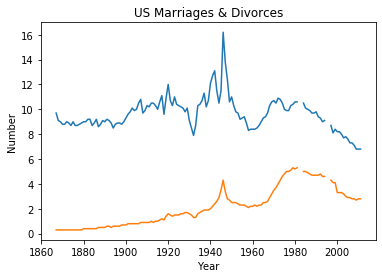

In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/yjoco/Python Save')
us_marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
columns = us_marriage.columns.drop(['Marriages','Divorces','Population','Year'])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(us_marriage['Year'], us_marriage[column])
ax.set_title('US Marriages & Divorces')
ax.set_xlabel('Year')
ax.set_ylabel('Number')

# Question 7

# Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

Text(0.5, 1.0, 'US Marriages & Divorces')

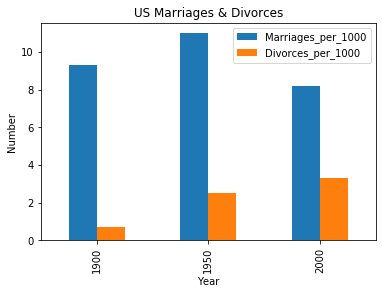

In [76]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/yjoco/Python Save')
us_marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
new_us_marriage = us_marriage[(us_marriage.Year == 1900) | (us_marriage.Year == 1950) | (us_marriage.Year == 2000)]
new_us_marriage = new_us_marriage.drop(columns = ['Marriages', 'Divorces', 'Population'])
new_us_marriage = new_us_marriage.set_index('Year')
new_us_marriage.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('US Marriages & Divorces')


# Question 8

# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

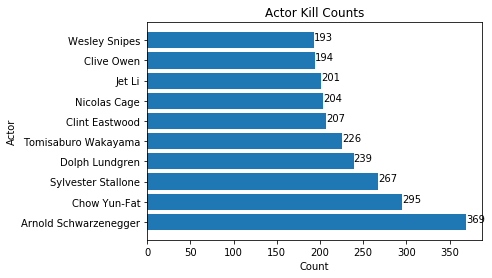

In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/yjoco/Python Save')

actor_kill_counts = pd.read_csv('actor_kill_counts.csv')
actor_kill_counts.sort_values(by = 'Count', ascending = False, inplace = True)
y = list(actor_kill_counts['Actor'])
x = list(actor_kill_counts['Count'])
plt.barh(y,x)
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Actor Kill Counts')
for value, index in enumerate(x):
    plt.text(index, value, str(index))

# Question 9

# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

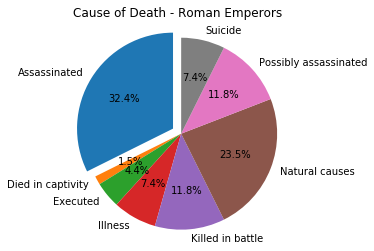

In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/yjoco/Python Save')
roman_emperor_reigns = pd.read_csv('roman-emperor-reigns.csv')
cod = roman_emperor_reigns.groupby('Cause_of_Death').count()[['Emperor']]
cod
emperor = pd.Series(cod['Emperor'])
cause_death = pd.Series(cod.index)
explode = (0.1,0,0,0,0,0,0,0)
fig2, ax2 = plt.subplots()
ax2.pie(emperor, explode=explode, labels=cause_death,autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')
plt.title('Cause of Death - Roman Emperors')
plt.show()

# Question 10

# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

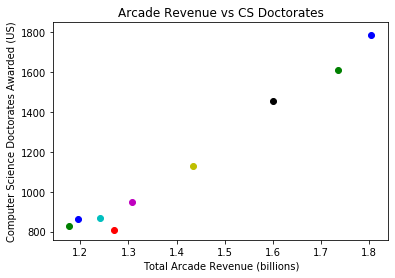

In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/yjoco/Python Save')
arcade_vs_csphd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colors = {2000:'b',2001:'g', 2002:'r',2003:'c',2004:'m', 2005:'y',2006:'k',2007:'w', 2008:'b',2009:'g'}
fig4, ax4 = plt.subplots()
for i in range (len(arcade_vs_csphd['Total Arcade Revenue (billions)'])):
    ax4.scatter(arcade_vs_csphd['Total Arcade Revenue (billions)'][i],arcade_vs_csphd['Computer Science Doctorates Awarded (US)'][i], color = colors[arcade_vs_csphd['Year'][i]])
ax4.set_title('Arcade Revenue vs CS Doctorates')
ax4.set_xlabel('Total Arcade Revenue (billions)')
ax4.set_ylabel('Computer Science Doctorates Awarded (US)')
